In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('aspiring_minds_employability_outcomes_2015.csv')

In [4]:
print("Head of the data:")
print(data.head())

Head of the data:
  Unnamed: 0      ID     Salary            DOJ            DOL  \
0      train  203097   420000.0  6/1/2012 0:00        present   
1      train  579905   500000.0  9/1/2013 0:00        present   
2      train  810601   325000.0  6/1/2014 0:00        present   
3      train  267447  1100000.0  7/1/2011 0:00        present   
4      train  343523   200000.0  3/1/2014 0:00  3/1/2015 0:00   

                Designation    JobCity Gender             DOB  10percentage  \
0   senior quality engineer  Bangalore      f  2/19/1990 0:00          84.3   
1         assistant manager     Indore      m  10/4/1989 0:00          85.4   
2          systems engineer    Chennai      f   8/3/1992 0:00          85.0   
3  senior software engineer    Gurgaon      m  12/5/1989 0:00          85.6   
4                       get    Manesar      m  2/27/1991 0:00          78.0   

   ... ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0  ...              -1             

In [5]:
print("\nShape of the data:")
print(data.shape)


Shape of the data:
(3998, 39)


In [6]:
print("\nDescription of the data:")
print(data.describe())


Description of the data:
                 ID        Salary  10percentage  12graduation  12percentage  \
count  3.998000e+03  3.998000e+03   3998.000000   3998.000000   3998.000000   
mean   6.637945e+05  3.076998e+05     77.925443   2008.087544     74.466366   
std    3.632182e+05  2.127375e+05      9.850162      1.653599     10.999933   
min    1.124400e+04  3.500000e+04     43.000000   1995.000000     40.000000   
25%    3.342842e+05  1.800000e+05     71.680000   2007.000000     66.000000   
50%    6.396000e+05  3.000000e+05     79.150000   2008.000000     74.400000   
75%    9.904800e+05  3.700000e+05     85.670000   2009.000000     82.600000   
max    1.298275e+06  4.000000e+06     97.760000   2013.000000     98.700000   

          CollegeID  CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
count   3998.000000  3998.000000  3998.000000    3998.000000      3998.000000   
mean    5156.851426     1.925713    71.486171    5156.851426         0.300400   
std     4802.261482

In [7]:
numerical_cols = ['Salary', '10percentage', '12graduation', '12percentage', 'CollegeID', 'CollegeTier', 'CollegeCityID', 'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']
for col in numerical_cols:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f'{col}: {len(outliers)} outliers')


Salary: 109 outliers
10percentage: 30 outliers
12graduation: 45 outliers
12percentage: 1 outliers
CollegeID: 0 outliers
CollegeTier: 297 outliers
CollegeCityID: 0 outliers
CollegeCityTier: 0 outliers
GraduationYear: 2 outliers
English: 15 outliers
Logical: 18 outliers
Quant: 25 outliers
conscientiousness: 39 outliers
agreeableness: 123 outliers
extraversion: 40 outliers
nueroticism: 15 outliers
openess_to_experience: 95 outliers


Univariate Analysis

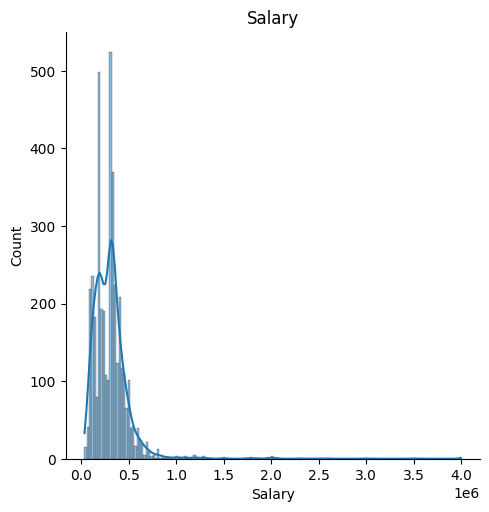

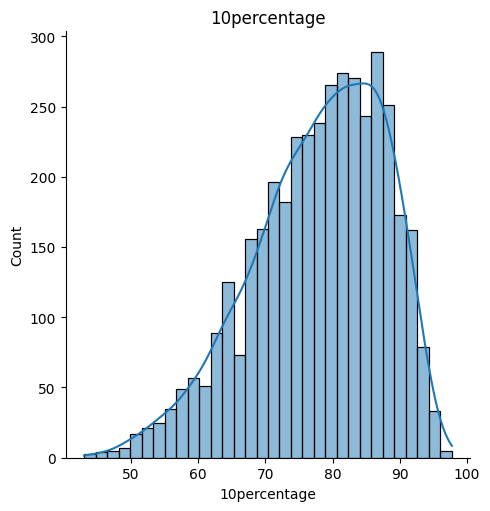

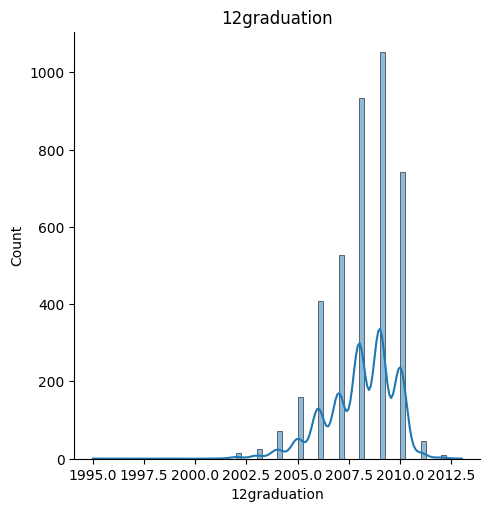

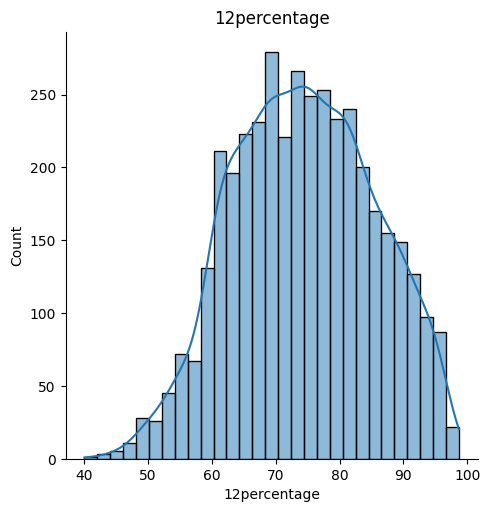

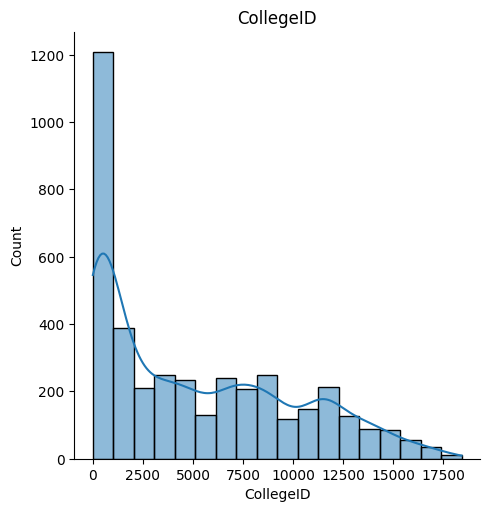

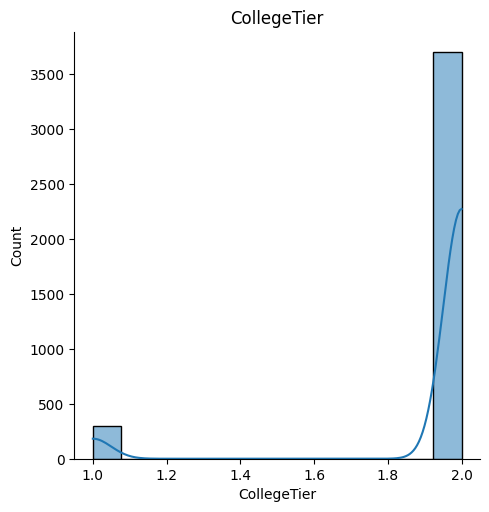

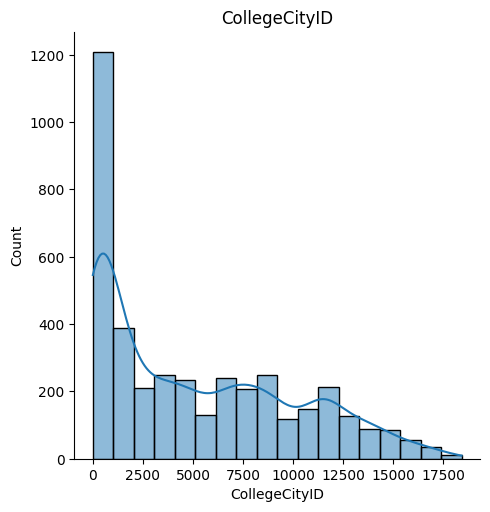

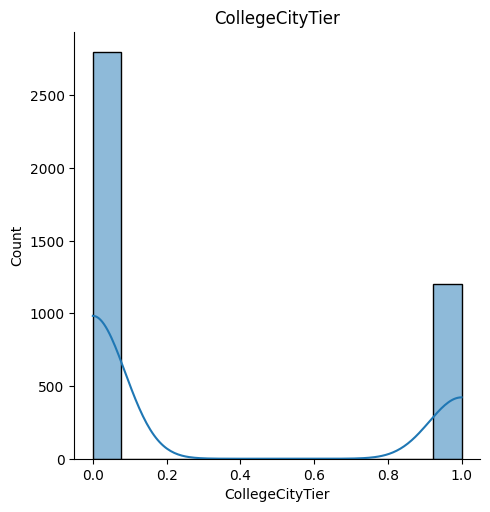

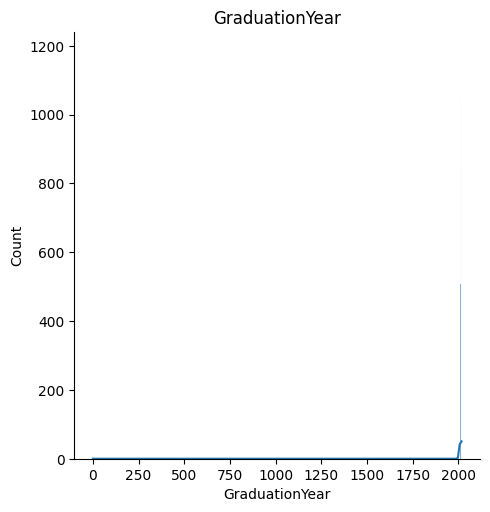

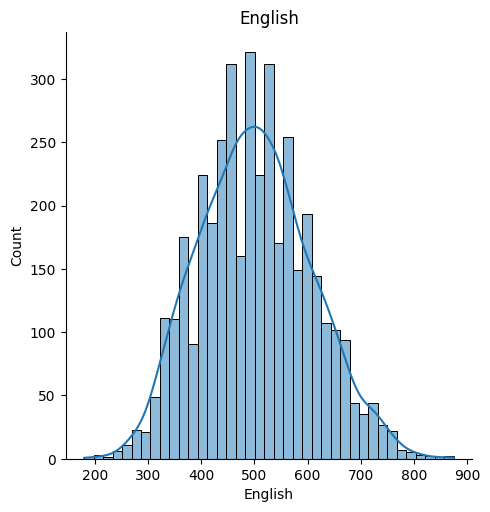

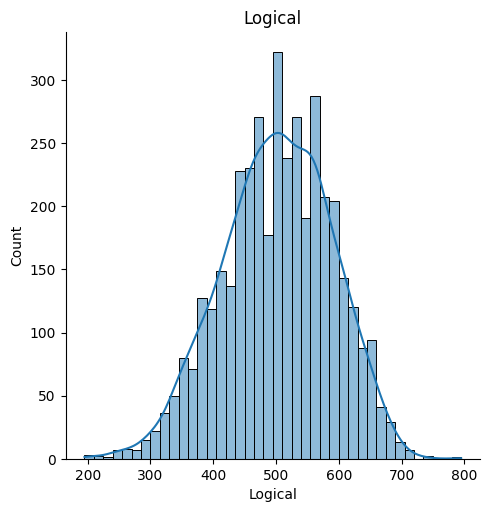

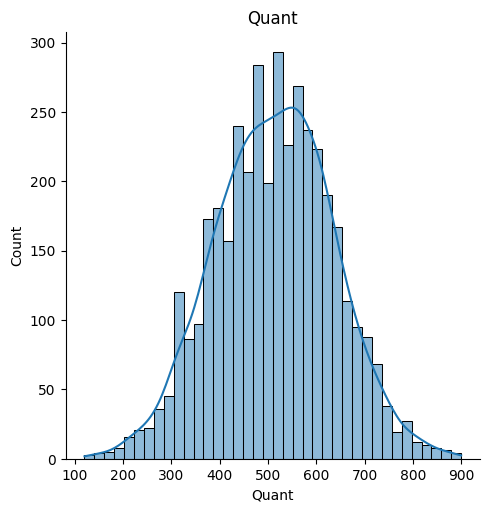

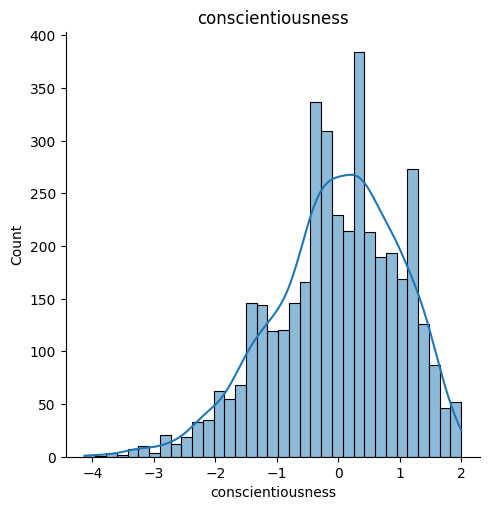

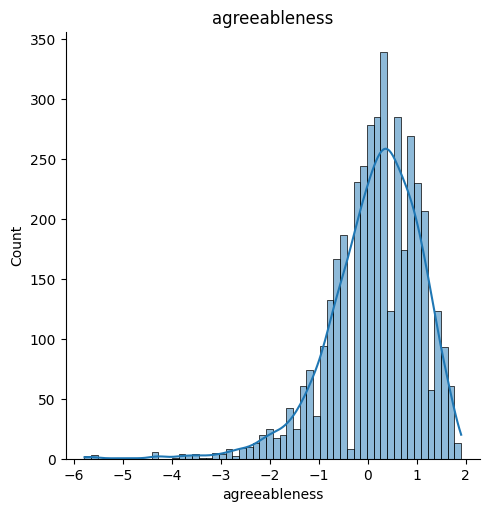

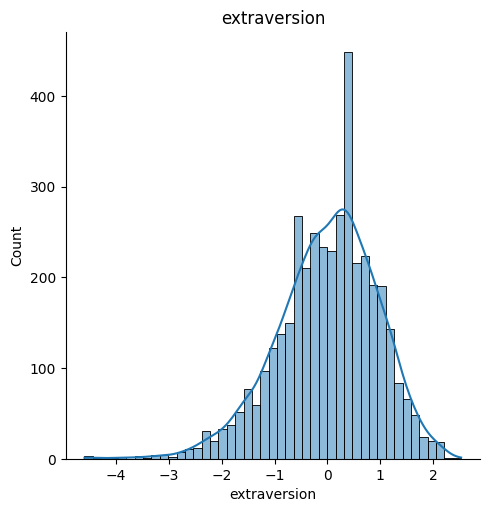

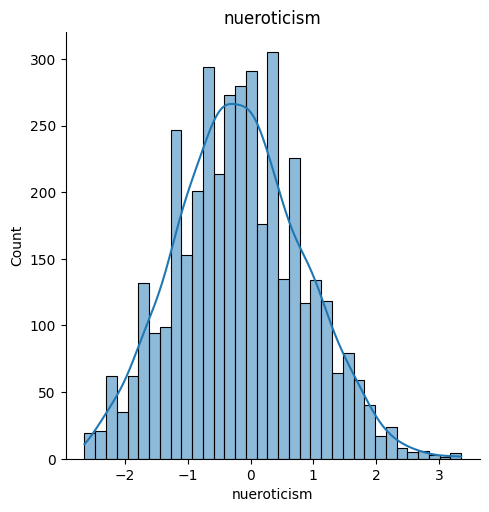

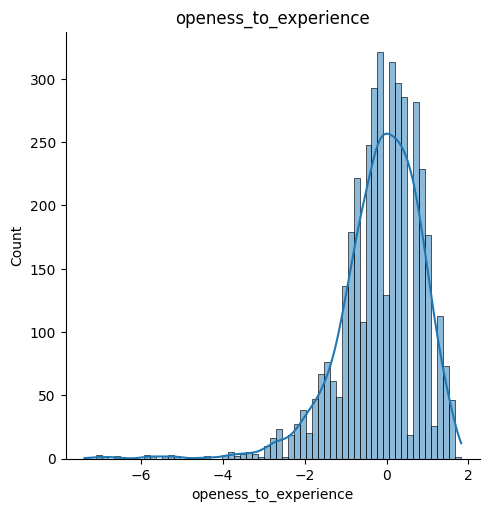

In [8]:
for col in numerical_cols:
    sns.displot(data[col], kde=True)
    plt.title(col)
    plt.show()


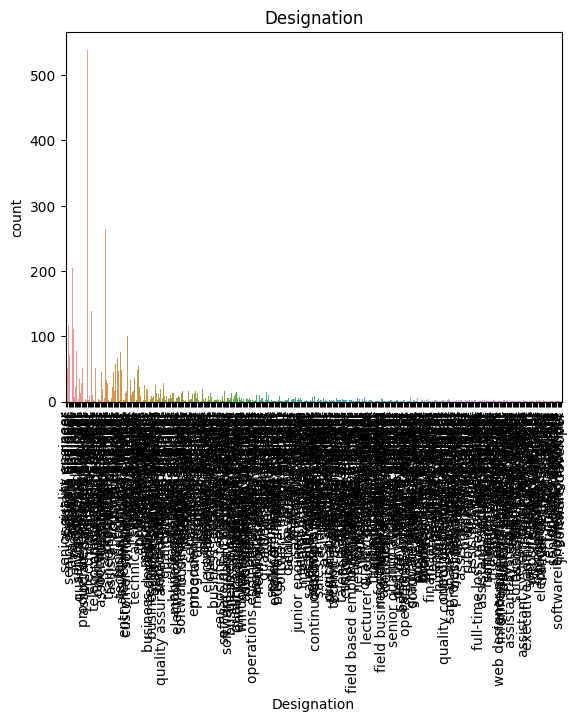

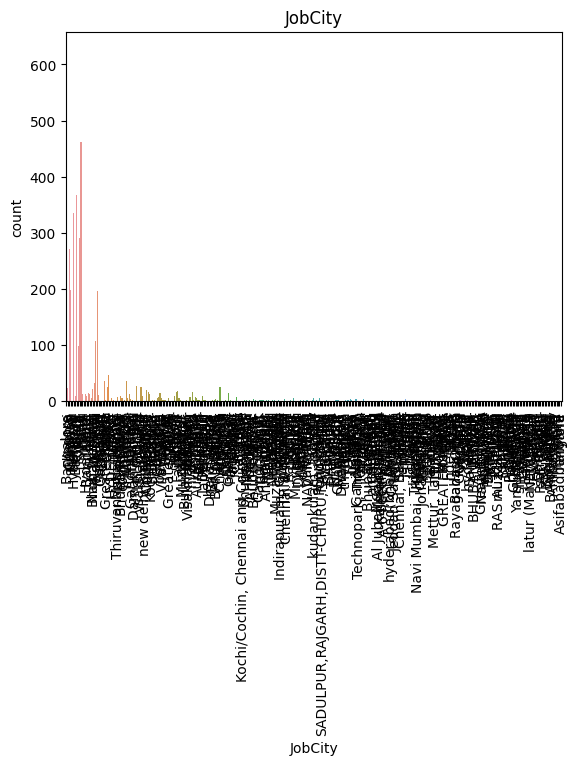

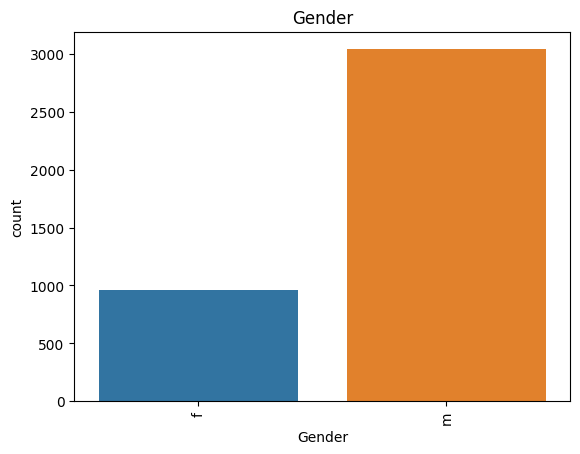

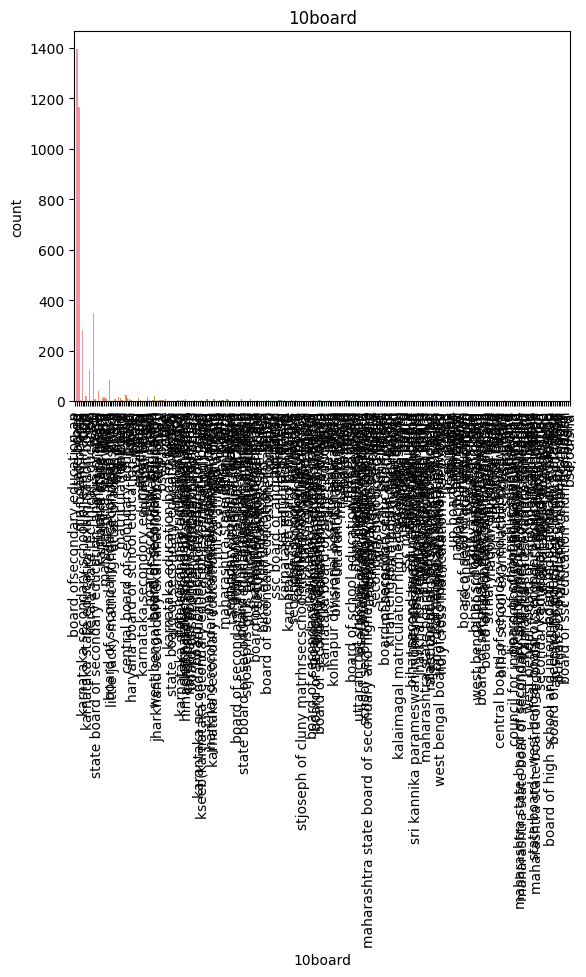

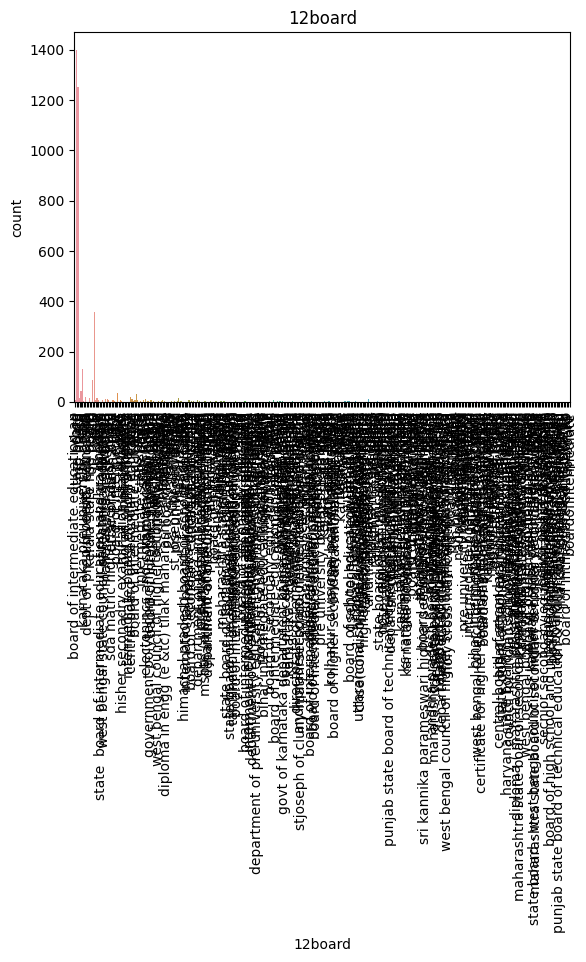

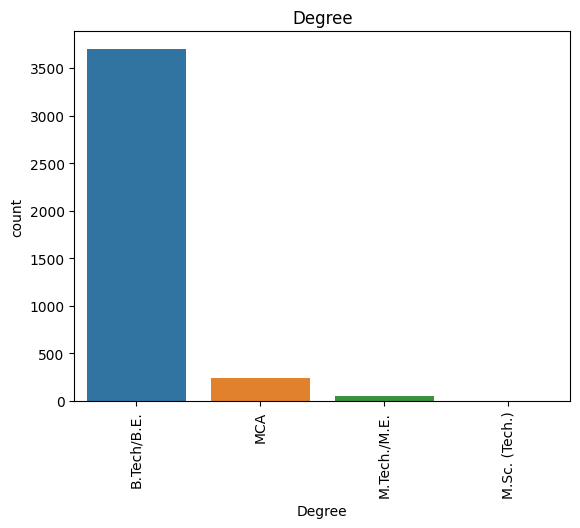

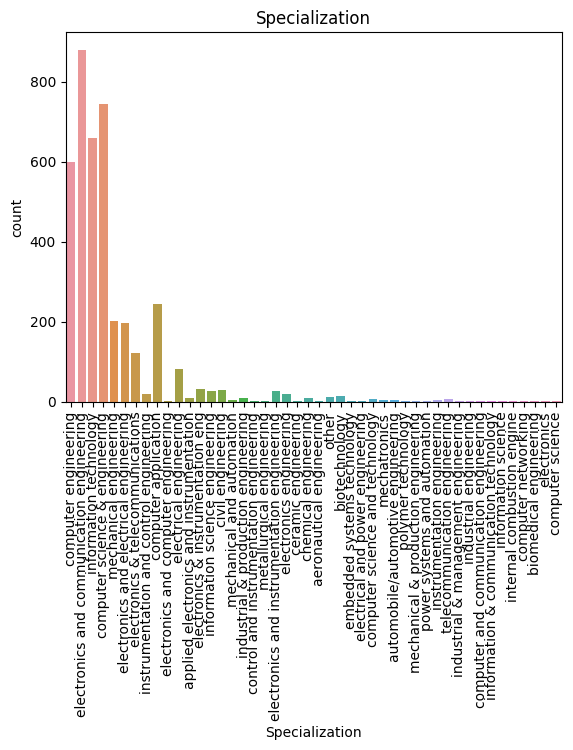

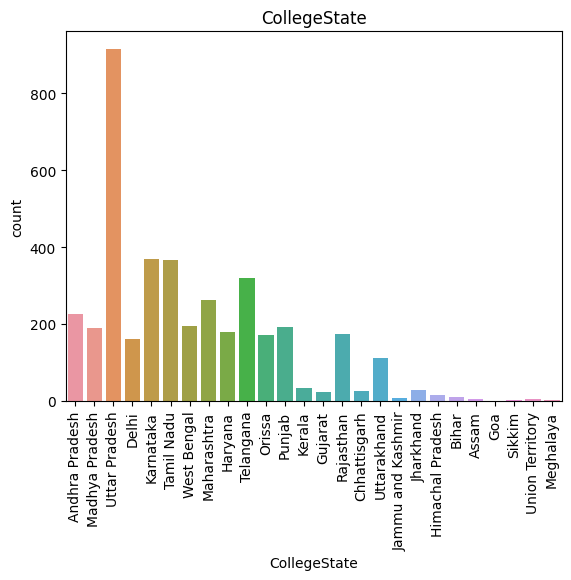

In [9]:
# frequency distribution of each categorical variable/column
categorical_cols = ['Designation', 'JobCity', 'Gender', '10board', '12board', 'Degree', 'Specialization', 'CollegeState']
for col in categorical_cols:
    sns.countplot(x=col, data=data)
    plt.xticks(rotation=90)
    plt.title(col)
    plt.show()

Bivariate Analysis

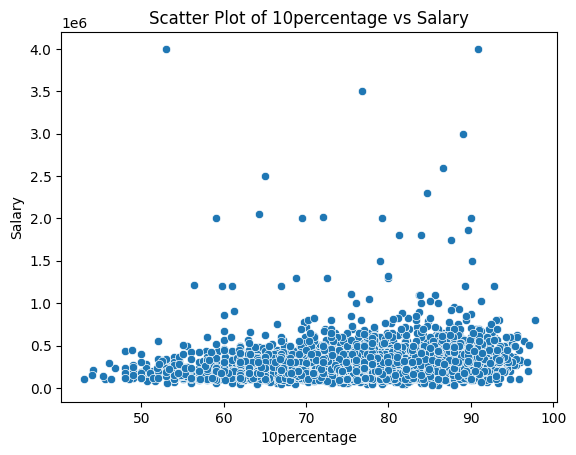

In [18]:
sns.scatterplot(x='10percentage', y='Salary', data=data)
plt.title('Scatter Plot of 10percentage vs Salary')
plt.show()

'''Observation: From the scatter plot, 
we can see that there is a positive correlation between 10percentage and Salary. Higher the percentage, higher the salary.'''

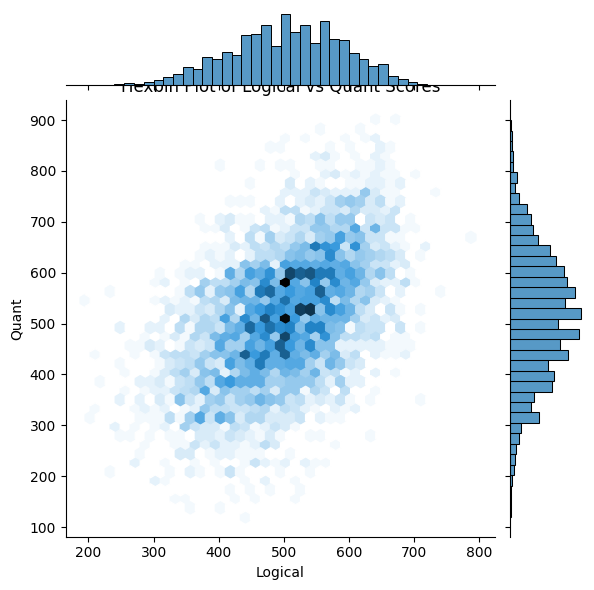

In [19]:
sns.jointplot(x='Logical', y='Quant', kind='hex', data=data)
plt.title('Hexbin Plot of Logical vs Quant Scores')
plt.show()
'''Observation: From the hexbin plot, we can see that there is a high concentration of 
data points around the scores of 500. Also, there is a positive correlation between Logical and Quant scores.'''

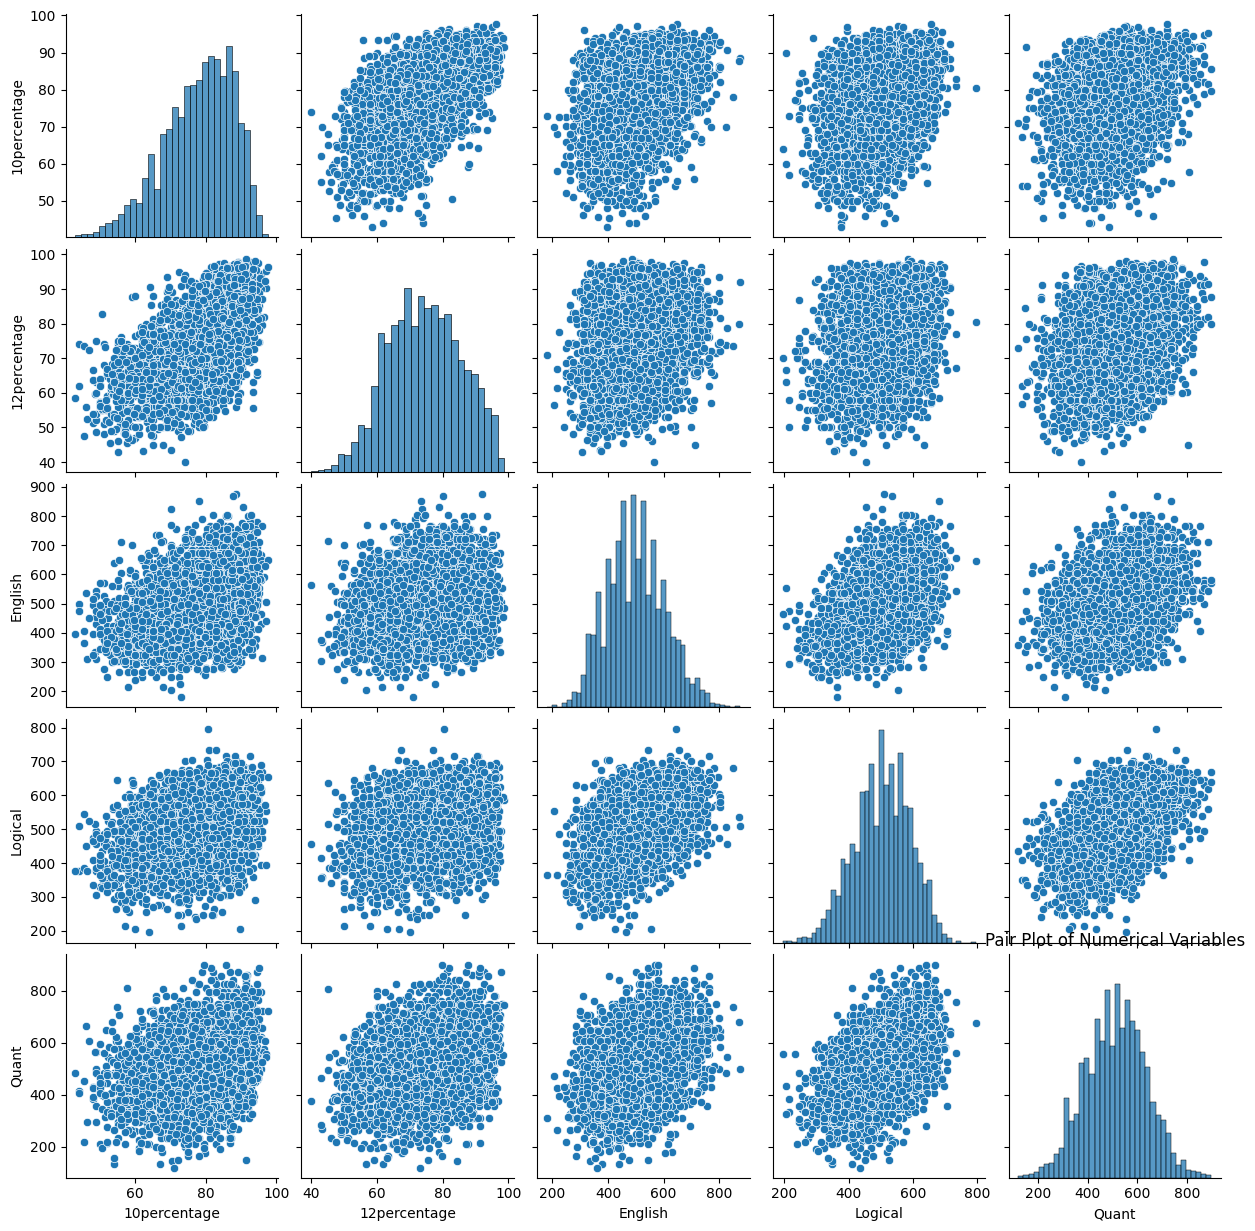

In [20]:
sns.pairplot(data[['10percentage', '12percentage', 'English', 'Logical', 'Quant']])
plt.title('Pair Plot of Numerical Variables')
plt.show()
'''Observation: From the pair plot, we can see that there is a positive correlation between 10percentage and 12percentage,
 as well as between English and Logical scores.'''


/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 64.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 83.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 77.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 89.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


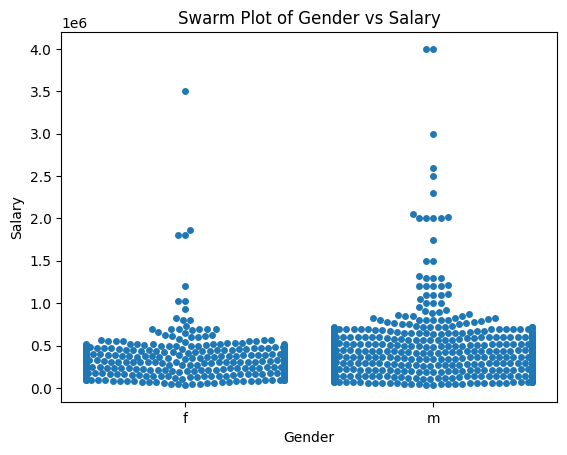

In [21]:
sns.swarmplot(x='Gender', y='Salary', data=data)
plt.title('Swarm Plot of Gender vs Salary')
plt.show()
'''Observation: From the swarm plot, we can see that there is a higher concentration of males with higher salaries compared to females.'''

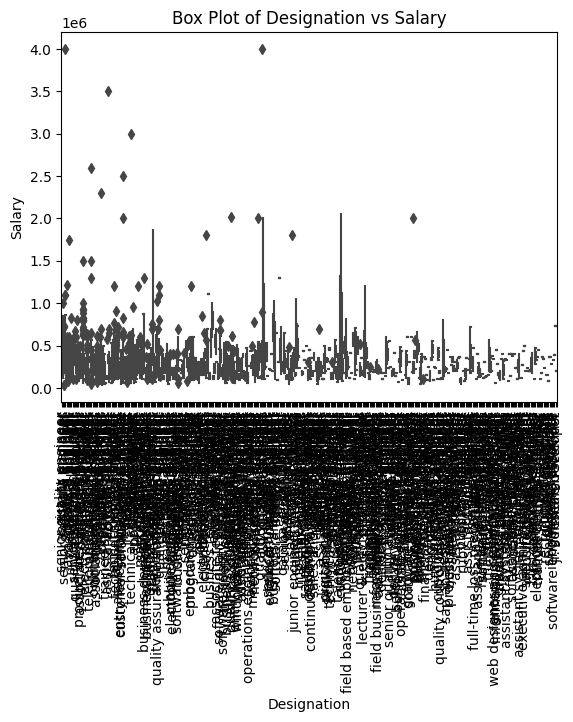

In [23]:
sns.boxplot(x='Designation', y='Salary', data=data)
plt.title('Box Plot of Designation vs Salary')
plt.xticks(rotation=90)
plt.show()
'''Observation: From the box plot, we can see that there is a significant difference in the salary distribution of different designations. 
For example, the salary distribution of a senior software engineer is higher compared to a systems engineer.'''


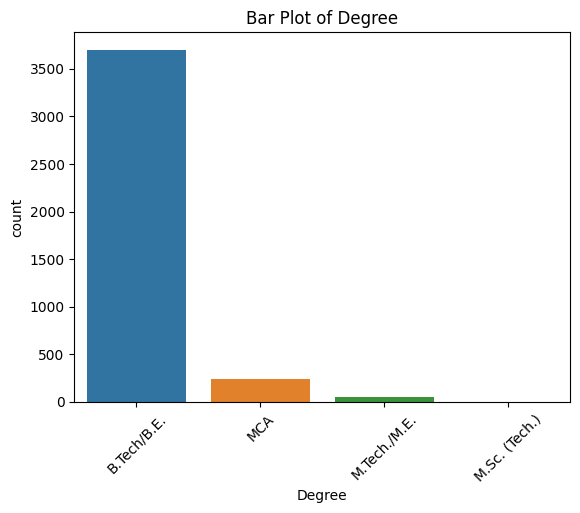

In [24]:
sns.countplot(x='Degree', data=data)
plt.title('Bar Plot of Degree')
plt.xticks(rotation=45)
plt.show()
'''Observation: From the bar plot, we can see that the majority of the candidates have a B.Tech/B.E. degree.'''


In [26]:
# Filter data based on job titles
job_titles = ['programming analyst', 'software engineer', 'hardware engineer', 'associate engineer']
filtered_data = data.loc[data['Designation'].str.lower().isin(job_titles)]

# Filter data for fresh graduates
filtered_data = filtered_data.loc[filtered_data['DOJ'].str.contains('2014|2015|2016')]

# Check if salaries are within the range of 2.5-3 lakhs
print(filtered_data.loc[(filtered_data['Salary'] < 300000) & (filtered_data['Salary'] > 250000)])


     Unnamed: 0       ID    Salary             DOJ            DOL  \
247       train  1088625  275000.0  12/1/2014 0:00        present   
389       train  1043845  275000.0   6/1/2014 0:00        present   
603       train   820700  265000.0   1/1/2015 0:00        present   
978       train  1143459  275000.0   7/1/2014 0:00        present   
1224      train  1062611  275000.0   8/1/2014 0:00        present   
1273      train  1077690  275000.0   9/1/2014 0:00        present   
1300      train  1198934  275000.0  12/1/2014 0:00        present   
1598      train  1031075  280000.0  12/1/2014 0:00  4/1/2015 0:00   
1877      train   798895  290000.0   4/1/2014 0:00        present   
2042      train   530470  275000.0   4/1/2014 0:00        present   
3294      train  1035883  280000.0   4/1/2014 0:00        present   
3632      train  1046259  280000.0   7/1/2014 0:00        present   
3907      train   530601  290000.0   6/1/2014 0:00        present   

            Designation      JobC

In [27]:
import scipy.stats as stats

# Cross tabulate gender and specialization
cross_tab = pd.crosstab(data['Gender'], data['Specialization'], margins=True)

# Perform chi-square test
chi2_stat, p_val, dof, ex = stats.chi2_contingency(cross_tab)

# Print the p-value
print('p-value:', p_val)


p-value: 0.1763573393226839


In [ ]:
'''If the p-value is less than 0.05, we can reject the null hypothesis that there is no relationship between gender and 
specialization, which means that there is a significant relationship.'''

Here's how we can perform feature transformation on the given data:

First, we need to identify the numerical and categorical features in the data.

Numerical Features:

Salary
10percentage
12graduation
12percentage
CollegeID
CollegeTier
collegeGPA
CollegeCityID
CollegeCityTier
GraduationYear
English
Logical
Quant
Domain
ComputerProgramming
ElectronicsAndSemicon
ComputerScience
MechanicalEngg
ElectricalEngg
TelecomEngg
CivilEngg
conscientiousness
agreeableness
extraversion
nueroticism
openess_to_experience
Categorical Features:

DOJ
DOL
Designation
JobCity
Gender
DOB
10board
Degree
Specialization
CollegeState
For numerical features, we'll perform column standardization using the StandardScaler from the scikit-learn library. For categorical features, we'll convert them into dummy variables using the pd.get_dummies() function.

In [28]:
from sklearn.preprocessing import StandardScaler

In [31]:
# Identify the numerical and categorical features
numerical_features = ['Salary', '10percentage', '12graduation', '12percentage', 'CollegeID', 'CollegeTier', 
                      'collegeGPA', 'CollegeCityID', 'CollegeCityTier', 'GraduationYear', 'English', 'Logical',
                      'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
                      'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 
                      'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']
categorical_features = ['DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB', '10board', 'Degree', 
                        'Specialization', 'CollegeState']

data.to_csv('train_transformed.csv', index=False)

In [32]:
# Standardize the numerical features
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])


In [33]:
# Convert categorical features into dummy variables
data = pd.get_dummies(data, columns=categorical_features)

In [35]:
# Save the transformed data
data.to_csv('train_transformed.csv', index=False)